In [219]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import mae ,mse
from tensorflow.keras.optimizers import SGD, Adam

### Зчитаємо дані з файлу

In [220]:
data = pd.read_csv('Input data.csv', header = None, skiprows = 1)
data = data.drop(columns=data.columns[0], axis=1, inplace=False)
data.head()

,1,2,3,4,5,6
0,-1.085631,0.997345,0.282978,-1.506295,-0.578600,-85.398884
1,1.651437,-2.426679,-0.428913,1.265936,-0.866740,-39.874226
2,-0.678886,-0.094709,1.491390,-0.638902,-0.443982,-21.669375
3,-0.434351,2.205930,2.186786,1.004054,0.386186,233.417683
4,0.737369,1.490732,-0.935834,1.175829,-1.253881,67.907278


### Розмір датасету

In [221]:
data.shape

(1500000, 6)

### Розділимо датасет на характеристики (X) і цільову зміну (Y)

In [222]:
X = data.drop(columns=data.iloc[:,-1:], axis=1)
Y = data.iloc[:,-1:]

### Розділ датасету на тренувальну та тестову вибірку

In [223]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.02)
X_val, X_test, Y_val, Y_test = train_test_split(X_val,Y_val, test_size=0.5)

In [224]:
X_train.shape

(1470000, 5)

In [225]:
X_val.shape

(15000, 5)

In [226]:
X_test.shape

(15000, 5)

# Навчання мережі
### 1)

In [227]:
tf.random.set_seed(49)
model = Sequential([Dense(10),Dense(1)])
model.compile(loss=mae, optimizer=SGD(), metrics=[mae])
history = model.fit(X_train,Y_train, epochs = 10, batch_size = 100,validation_data=(X_val,Y_val))

Epoch 1/10
14700/14700 [==============================] - 8s 498us/step - loss: 1.8133 - mean_absolute_error: 1.8133 - val_loss: 0.2408 - val_mean_absolute_error: 0.2408
Epoch 2/10
14700/14700 [==============================] - 7s 464us/step - loss: 0.5880 - mean_absolute_error: 0.5880 - val_loss: 0.5084 - val_mean_absolute_error: 0.5084
Epoch 3/10
14700/14700 [==============================] - 7s 473us/step - loss: 0.5890 - mean_absolute_error: 0.5890 - val_loss: 0.5351 - val_mean_absolute_error: 0.5351
Epoch 4/10
14700/14700 [==============================] - 6s 433us/step - loss: 0.5893 - mean_absolute_error: 0.5893 - val_loss: 0.4879 - val_mean_absolute_error: 0.4879
Epoch 5/10
14700/14700 [==============================] - 6s 442us/step - loss: 0.5881 - mean_absolute_error: 0.5881 - val_loss: 0.9837 - val_mean_absolute_error: 0.9837
Epoch 6/10
14700/14700 [==============================] - 7s 487us/step - loss: 0.5887 - mean_absolute_error: 0.5887 - val_loss: 0.7649 - val_mean_abs

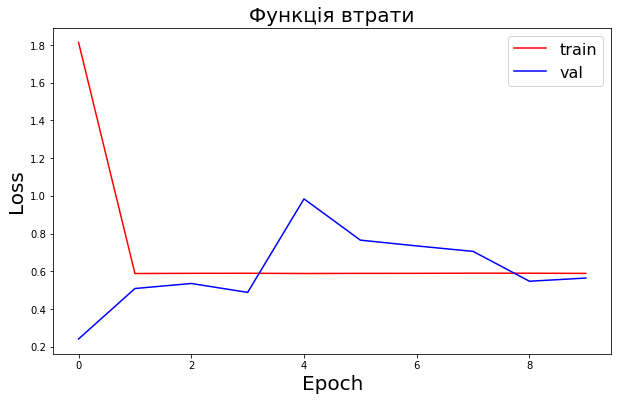

In [228]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history.history['loss'], 'r', label='train')
ax.plot(history.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.title("Функція втрати", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

#### Як видно з графіку, функція витрати на валідаційній вибірці cпівпадає з тренувальною, отже у нас  не спостерігається underfitting або overfitting. Проте, витрати досить значні. 

### 2) Змінимо optimizer на Adam()

In [229]:
tf.random.set_seed(49)
model_2 = Sequential([Dense(10),Dense(1)])
model_2.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_2 = model_2.fit(X_train,Y_train, epochs = 10, batch_size = 100,validation_data=(X_val,Y_val))

Epoch 1/10
14700/14700 [==============================] - 13s 833us/step - loss: 5.3564 - mean_absolute_error: 5.3564 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069
Epoch 2/10
14700/14700 [==============================] - 9s 605us/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0053 - val_mean_absolute_error: 0.0053
Epoch 3/10
14700/14700 [==============================] - 11s 739us/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.0048 - val_mean_absolute_error: 0.0048
Epoch 4/10
14700/14700 [==============================] - 15s 1ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066
Epoch 5/10
14700/14700 [==============================] - 9s 635us/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.0042 - val_mean_absolute_error: 0.0042
Epoch 6/10
14700/14700 [==============================] - 8s 575us/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.0057 - val_mean_ab

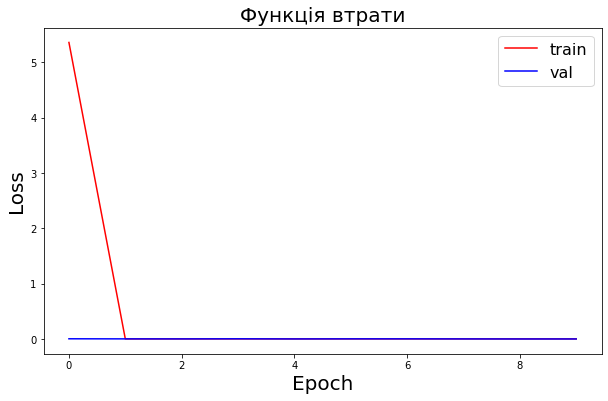

In [230]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_2.history['loss'], 'r', label='train')
ax.plot(history_2.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.title("Функція втрати", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

#### Як видно з графіку, функція витрати на валідаційній вибірці cпівпадає з тренувальною і функція втрати показують значно менші показники.

### 3) Збільшимо batch_size та кількість епох, за оптимайзер далі будемо брати Adam

In [231]:
tf.random.set_seed(49)
model_3 = Sequential([Dense(10),Dense(1)])
model_3.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_3 = model_3.fit(X_train,Y_train, epochs = 15, batch_size = 256,validation_data=(X_val,Y_val))

Epoch 1/15
5743/5743 [==============================] - 5s 686us/step - loss: 13.5716 - mean_absolute_error: 13.5716 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061
Epoch 2/15
5743/5743 [==============================] - 4s 675us/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0050 - val_mean_absolute_error: 0.0050
Epoch 3/15
5743/5743 [==============================] - 4s 642us/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0048 - val_mean_absolute_error: 0.0048
Epoch 4/15
5743/5743 [==============================] - 4s 659us/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0033 - val_mean_absolute_error: 0.0033
Epoch 5/15
5743/5743 [==============================] - 4s 656us/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067
Epoch 6/15
5743/5743 [==============================] - 4s 626us/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0058 - val_mean_absolute_erro

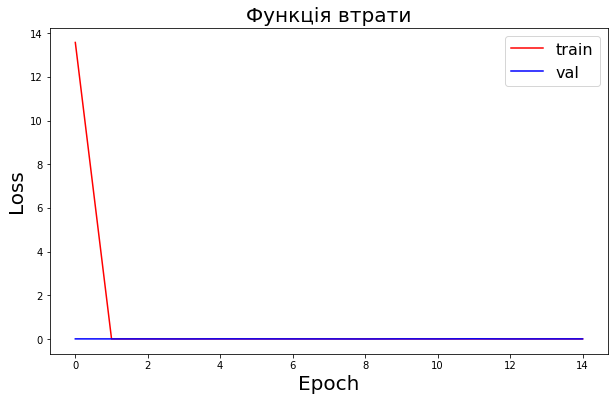

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_3.history['loss'], 'r', label='train')
ax.plot(history_3.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.title("Функція втрати", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

#### Як видно, втрати стали трохи меньше.

### 4) Ускладнимо архітектуру мережі

In [233]:
tf.random.set_seed(49)
model_4 = Sequential([Dense(20),Dense(10),Dense(5),Dense(1)])
model_4.compile(loss=mae, optimizer=Adam(), metrics=[mae])
history_4 = model_4.fit(X_train,Y_train, epochs = 15, batch_size = 256,validation_data=(X_val,Y_val))

Epoch 1/15
5743/5743 [==============================] - 6s 975us/step - loss: 2.2203 - mean_absolute_error: 2.2203 - val_loss: 0.0658 - val_mean_absolute_error: 0.0658
Epoch 2/15
5743/5743 [==============================] - 7s 1ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - val_loss: 0.0558 - val_mean_absolute_error: 0.0558
Epoch 3/15
5743/5743 [==============================] - 7s 1ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - val_loss: 0.0392 - val_mean_absolute_error: 0.0392
Epoch 4/15
5743/5743 [==============================] - 5s 917us/step - loss: 0.0423 - mean_absolute_error: 0.0423 - val_loss: 0.0531 - val_mean_absolute_error: 0.0531
Epoch 5/15
5743/5743 [==============================] - 6s 1ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 6/15
5743/5743 [==============================] - 6s 991us/step - loss: 0.0424 - mean_absolute_error: 0.0424 - val_loss: 0.0560 - val_mean_absolute_error: 0.056

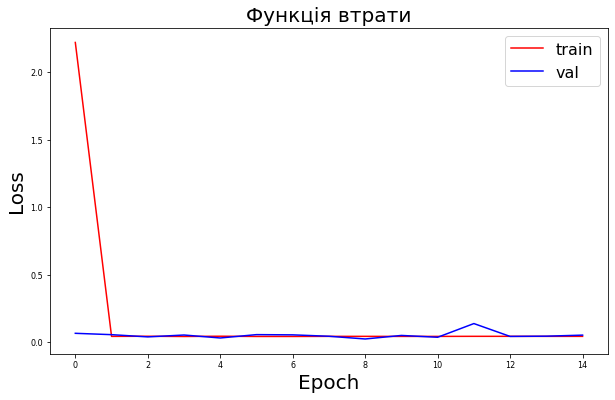

In [234]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_4.history['loss'], 'r', label='train')
ax.plot(history_4.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.title("Функція втрати", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=8)

#### Як видно, втрати на останніх епохах стали більше, отже ускладнення моделі не покращило її.

### 5) Ускладнена модель з градієнтним спуском

In [235]:
tf.random.set_seed(49)
model_5 = Sequential([Dense(20),Dense(10),Dense(5),Dense(1)])
model_5.compile(loss=mae, optimizer=SGD(), metrics=[mae])
history_5 = model_5.fit(X_train,Y_train, epochs = 15, batch_size = 256,validation_data=(X_val,Y_val))

Epoch 1/15
5743/5743 [==============================] - 6s 935us/step - loss: 10.5452 - mean_absolute_error: 10.5452 - val_loss: 18.1873 - val_mean_absolute_error: 18.1873absolute_ - ETA
Epoch 2/15
5743/5743 [==============================] - 5s 851us/step - loss: 10.0386 - mean_absolute_error: 10.0386 - val_loss: 21.9625 - val_mean_absolute_error: 21.9625
Epoch 3/15
5743/5743 [==============================] - 5s 898us/step - loss: 9.9978 - mean_absolute_error: 9.9978 - val_loss: 6.1436 - val_mean_absolute_error: 6.1436s
Epoch 4/15
5743/5743 [==============================] - 5s 833us/step - loss: 9.9738 - mean_absolute_error: 9.9738 - val_loss: 17.1661 - val_mean_absolute_error: 17.1661
Epoch 5/15
5743/5743 [==============================] - 5s 847us/step - loss: 9.9958 - mean_absolute_error: 9.9958 - val_loss: 4.6527 - val_mean_absolute_error: 4.6527
Epoch 6/15
5743/5743 [==============================] - 5s 834us/step - loss: 10.0560 - mean_absolute_error: 10.0560 - val_loss: 5.364

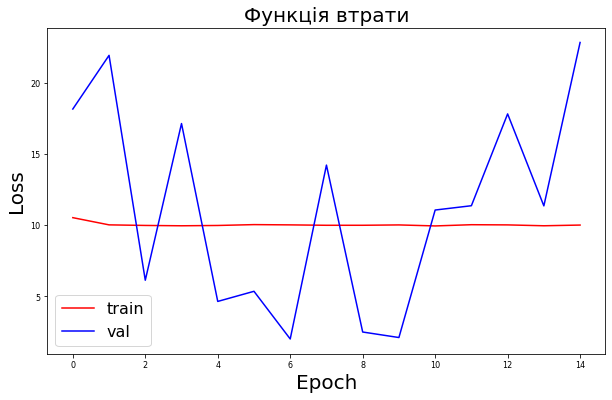

In [236]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_5.history['loss'], 'r', label='train')
ax.plot(history_5.history['val_loss'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
plt.title("Функція втрати", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=8)

#### Дана модель показує аномальні показники 

# Побудова прогнозу

In [237]:
Y_hat = model.predict(X_test)
Y_hat_2 = model_2.predict(X_test)
Y_hat_3 = model_3.predict(X_test)
Y_hat_4 = model_4.predict(X_test)
Y_hat_5 = model_5.predict(X_test)

# Візуалізація результатів

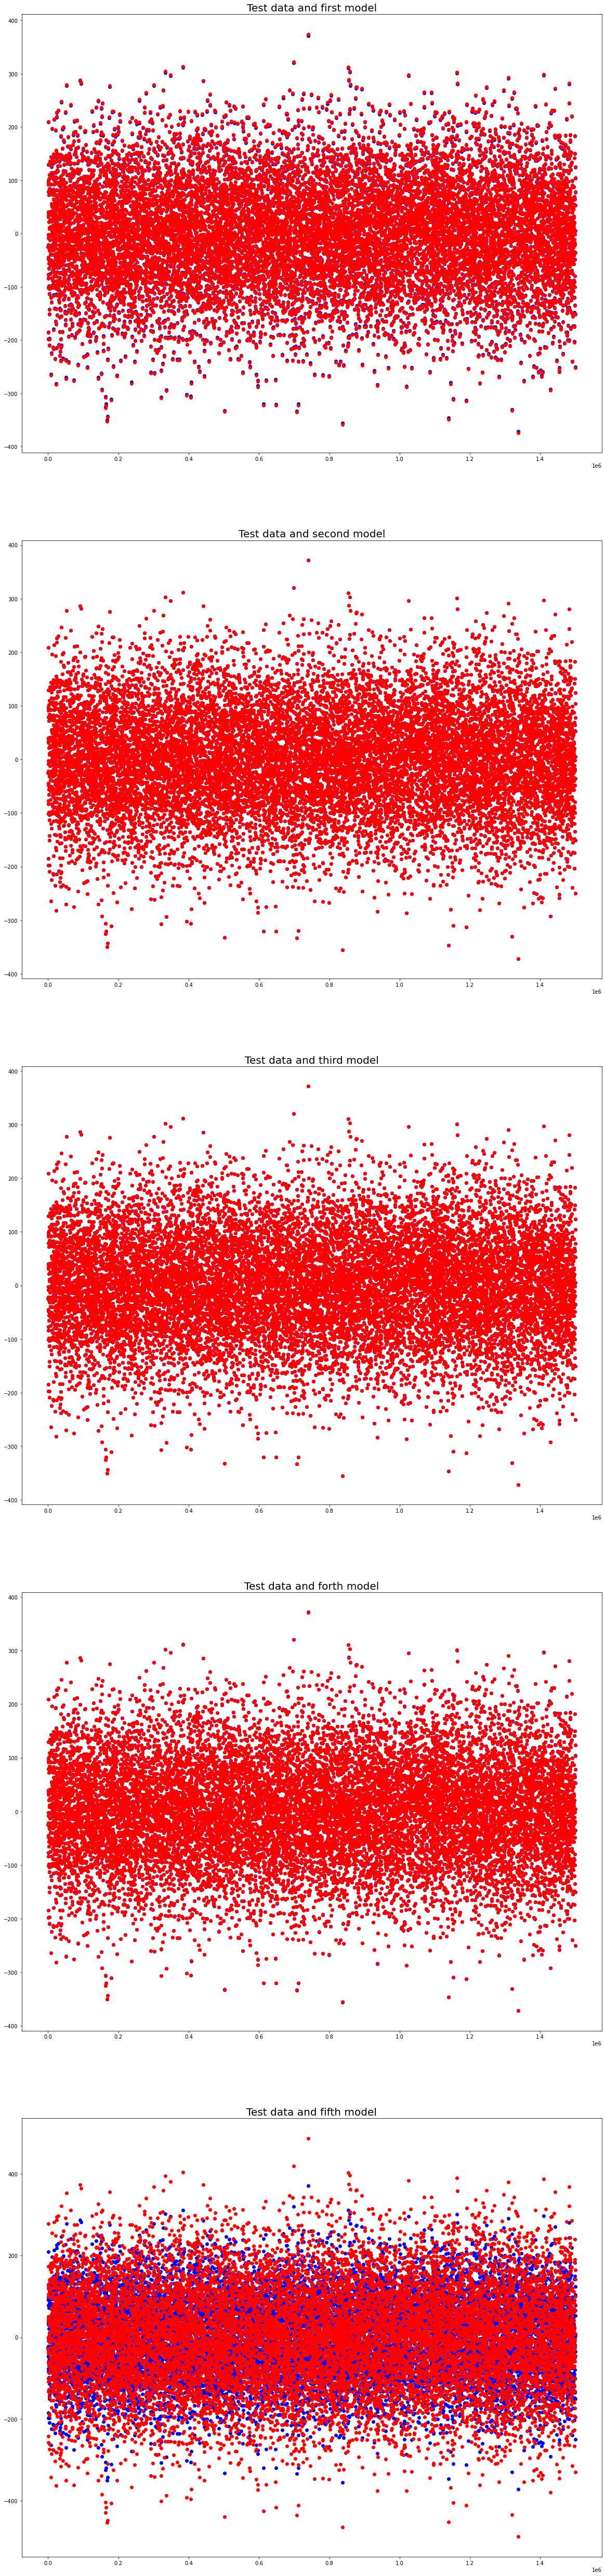

In [238]:
fig,axs = plt.subplots(5, figsize=(20, 90))
axs[0].set_title('Test data and first model',fontsize=20)
axs[0].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[0].scatter(X_test.index, Y_hat, c='r', label='First model')
axs[1].set_title('Test data and second model',fontsize=20)
axs[1].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[1].scatter(X_test.index, Y_hat_2, c='r', label='Second model')
axs[2].set_title('Test data and third model',fontsize=20)
axs[2].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[2].scatter(X_test.index, Y_hat_3, c='r', label='Third model')
axs[3].set_title('Test data and forth model',fontsize=20)
axs[3].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[3].scatter(X_test.index, Y_hat_4, c='r', label='Fourth model')
axs[4].set_title('Test data and fifth model',fontsize=20)
axs[4].scatter(X_test.index, Y_test, c='b', label='Test data')
axs[4].scatter(X_test.index, Y_hat_5, c='r', label='Fifth model')

# Висновки
В ході виконання даної лабораторної роботи була розібрана і використана функція make_regression()а також доведено, що точність прогнозу нейронної мережі залежить від налаштування гіперпараметрів.